<a href="https://colab.research.google.com/github/chengcheny/Testing/blob/master/Pytorch_learning_sripts_from_org3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [0]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())

In [0]:
#plt.scatter(x.data.numpy(), y.data.numpy())
#plt.show()

In [0]:
class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden)
    self.predict = torch.nn.Linear(n_hidden, n_output)
  def forward(self, x):
    x = F.relu(self.hidden(x))
    x = self.predict(x)
    return x

In [244]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [0]:
plt.ion()

In [0]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

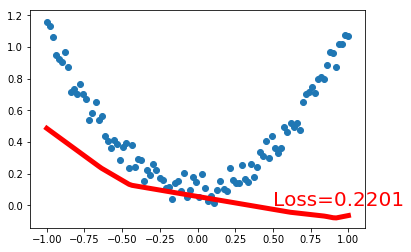

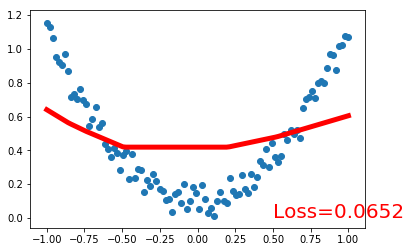

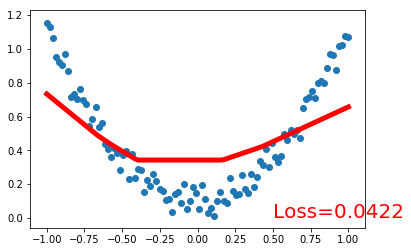

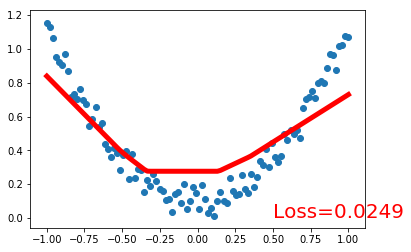

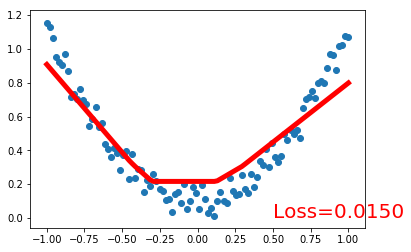

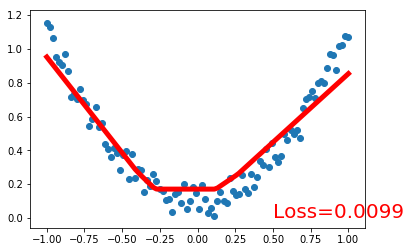

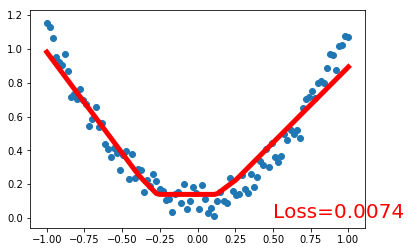

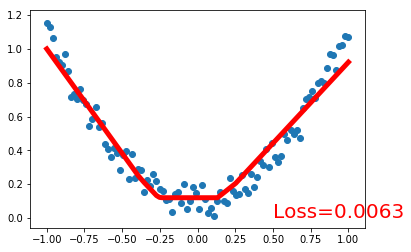

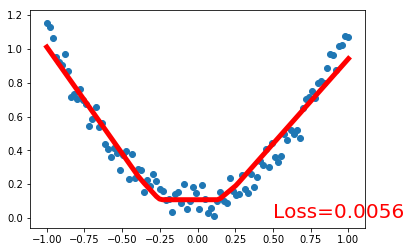

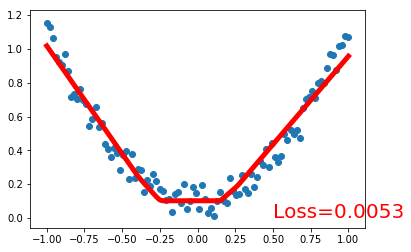

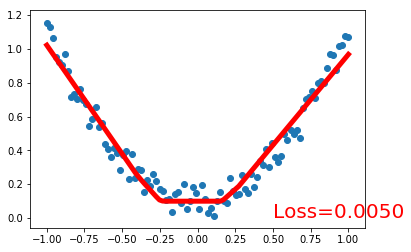

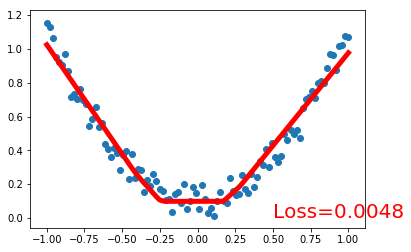

KeyboardInterrupt: ignored

In [247]:
for t in range(200):
  prediction = net(x)

  loss = loss_func(prediction, y)

  optimizer.zero_grad()
  
  loss.backward()

  optimizer.step()
  

  if t % 5 ==0:
    plt.cla()
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)
  plt.ioff()
  plt.show()
